## Tutorial 5

### Question 4

In [80]:
# import library
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt


In [11]:
# Set up function
y_noiseless = lambda x: np.sin(np.pi*x)

In [27]:
def generate_split_data(dataSize, trainingRatio, standardDeviation):
    '''
    generate data set and split them according to the training ratio
    variables are self-explainable
    :param dataSize: 
    :param trainingRatio: 
    :param standardDeviation: 
    :return: dataTrain, labelTrain, dataTest, labelTest
    '''
    data = (rd.rand(dataSize)*2 - 1).reshape(dataSize,)
    random_noise = rd.normal(0, standardDeviation, dataSize).reshape(dataSize,)
    labelNoise = y_noiseless(data)+random_noise
    trainingSize = int(dataSize*trainingRatio)
    return data[0:trainingSize], labelNoise[0:trainingSize], data[trainingSize:dataSize], labelNoise[trainingSize:dataSize]
    

In [28]:
# Get the training and testing data set
dataTrain, labelTrain, dataTest, labelTest = generate_split_data(20, 0.5, 0.2)

In [58]:
def error_cal(data, label, poly):
    N = data.shape[0]
    res = 0
    for i in range(N):
        res += (poly(data[i])-label[i])**2
    return res/N

In [59]:
def fit_error(dataTrain, labelTrain, dataTest, labelTest, degree):
    z = np.polyfit(dataTrain, labelTrain, degree)
    p = np.poly1d(z)
    return error_cal(dataTrain, labelTrain, poly=p), error_cal(dataTest, labelTest, poly=p)

In [65]:
def plot(dataSize, trainingRatio, standardDeviation):
    dataTrain, labelTrain, dataTest, labelTest = generate_split_data(dataSize, trainingRatio, standardDeviation)
    in_error = []
    out_error = []
    degree_list = [1,2,3,4,5,6]
    for degree in degree_list:
        in_err, out_err = fit_error(dataTrain, labelTrain, dataTest, labelTest, degree)
        in_error.append(in_err)
        out_error.append(out_err)
    
    plt.plot(degree_list, in_error, "bo")
    plt.plot(degree_list, out_error, "ms")
    plt.show()


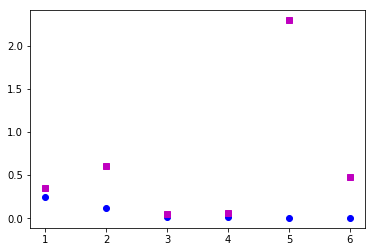

In [75]:
plot(20, 0.5, 0.2)

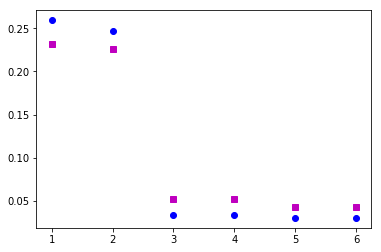

In [77]:
plot(200, 0.5, 0.2)

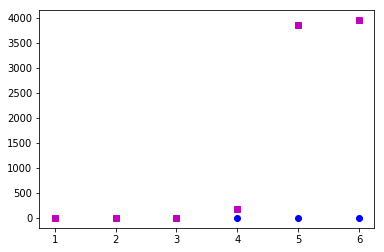

In [79]:
plot(20, 0.5, 0.5)